In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("labels.csv")

In [4]:
data.head()

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,CIDEr,METEOR,generated_caption,image_id,chair_hallucinated_objects_count,chair_hallucinated_objects_list,chair_has_hallucination,chair_mentioned_objects_count
0,0.857143,0.574169,0.301740,0.000040,1.117483,0.330889,"A tent is set up in a wooded area, with a car ...",COCO_train2014_000000412508,0,NaN,0,1
1,0.600000,0.358569,0.214651,0.000030,0.238908,0.122525,"A bathroom sink with a potted plant, bottles o...",COCO_train2014_000000412516,2,potted plant;sink,1,3
2,0.600000,0.414039,0.297662,0.216520,0.637103,0.317307,"A cozy living room with a fireplace, a couch, ...",COCO_train2014_000000412518,1,potted plant,1,3
3,0.733333,0.560612,0.417030,0.278824,0.495129,0.295474,A man is performing a trick on a skateboard in...,COCO_train2014_000000412519,0,NaN,0,3
4,0.578947,0.439298,0.283161,0.000035,0.310155,0.348253,A fire truck is parked in a garage with a red ...,COCO_train2014_000000412525,0,NaN,0,1


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BLEU-1                            72000 non-null  float64
 1   BLEU-2                            72000 non-null  float64
 2   BLEU-3                            72000 non-null  float64
 3   BLEU-4                            72000 non-null  float64
 4   CIDEr                             72000 non-null  float64
 5   METEOR                            72000 non-null  float64
 6   generated_caption                 72000 non-null  object 
 7   image_id                          72000 non-null  object 
 8   chair_hallucinated_objects_count  72000 non-null  int64  
 9   chair_hallucinated_objects_list   12354 non-null  object 
 10  chair_has_hallucination           72000 non-null  int64  
 11  chair_mentioned_objects_count     72000 non-null  int64  
dtypes: f

In [7]:
data.chair_hallucinated_objects_count.value_counts()

chair_hallucinated_objects_count
0    59646
1    10047
2     1731
3      377
4      138
5       47
6       13
7        1
Name: count, dtype: int64

In [8]:
data.chair_has_hallucination.value_counts()

chair_has_hallucination
0    59646
1    12354
Name: count, dtype: int64

In [9]:
data.chair_mentioned_objects_count.value_counts()

chair_mentioned_objects_count
1    28563
2    28190
3     8760
0     4568
4     1462
5      311
6       97
7       40
8        8
9        1
Name: count, dtype: int64

In [10]:
data['chair_regression_score'] = data.chair_hallucinated_objects_count / data.chair_mentioned_objects_count

<Axes: ylabel='Density'>

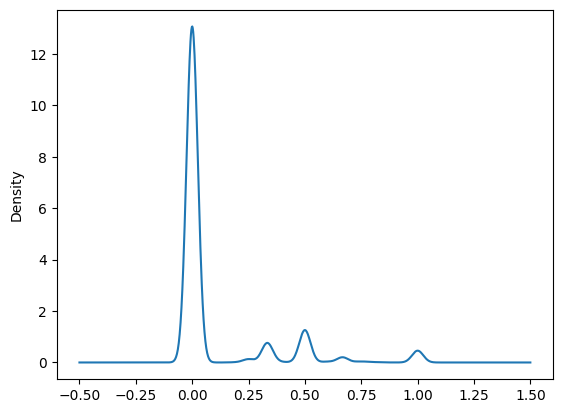

In [14]:
data.chair_regression_score.plot(kind='kde')

In [17]:
data.chair_regression_score.info()

<class 'pandas.core.series.Series'>
RangeIndex: 72000 entries, 0 to 71999
Series name: chair_regression_score
Non-Null Count  Dtype  
--------------  -----  
67432 non-null  float64
dtypes: float64(1)
memory usage: 562.6 KB


In [15]:
data.head()

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,CIDEr,METEOR,generated_caption,image_id,chair_hallucinated_objects_count,chair_hallucinated_objects_list,chair_has_hallucination,chair_mentioned_objects_count,chair_regression_score
0,0.857143,0.574169,0.301740,0.000040,1.117483,0.330889,"A tent is set up in a wooded area, with a car ...",COCO_train2014_000000412508,0,NaN,0,1,0.000000
1,0.600000,0.358569,0.214651,0.000030,0.238908,0.122525,"A bathroom sink with a potted plant, bottles o...",COCO_train2014_000000412516,2,potted plant;sink,1,3,0.666667
2,0.600000,0.414039,0.297662,0.216520,0.637103,0.317307,"A cozy living room with a fireplace, a couch, ...",COCO_train2014_000000412518,1,potted plant,1,3,0.333333
3,0.733333,0.560612,0.417030,0.278824,0.495129,0.295474,A man is performing a trick on a skateboard in...,COCO_train2014_000000412519,0,NaN,0,3,0.000000
4,0.578947,0.439298,0.283161,0.000035,0.310155,0.348253,A fire truck is parked in a garage with a red ...,COCO_train2014_000000412525,0,NaN,0,1,0.000000


In [18]:
data.dropna(subset=["chair_regression_score"], inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67432 entries, 0 to 71999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BLEU-1                            67432 non-null  float64
 1   BLEU-2                            67432 non-null  float64
 2   BLEU-3                            67432 non-null  float64
 3   BLEU-4                            67432 non-null  float64
 4   CIDEr                             67432 non-null  float64
 5   METEOR                            67432 non-null  float64
 6   generated_caption                 67432 non-null  object 
 7   image_id                          67432 non-null  object 
 8   chair_hallucinated_objects_count  67432 non-null  int64  
 9   chair_hallucinated_objects_list   12354 non-null  object 
 10  chair_has_hallucination           67432 non-null  int64  
 11  chair_mentioned_objects_count     67432 non-null  int64  
 12  chair_reg

In [20]:
data.to_csv("labels.csv", index=False)

In [38]:

import h5py
for i in range(1,25):
    try:
        f = h5py.File('/root/projects/Thesis_LLAVA/keen_probe/keen_data/2014_extracted_embeddings/generation_embeddings_V41_part'+str(i)+'.h5', 'r')
        print(list(f['COCO_train2014_000000484875']['post_generation'].keys()))
        print(i)
        print(list(f['COCO_train2014_000000484875']['post_generation']['step_final']['layer_0'].keys()))
        len(list(f['COCO_train2014_000000042228']['post_generation']['step_final']['layer_0']['image_embeddings']))
    except:
        pass


['step_1', 'step_2', 'step_3']
17


In [40]:
f = h5py.File('/root/projects/Thesis_LLAVA/keen_probe/keen_data/2014_extracted_embeddings/generation_embeddings_V41_part17.h5', 'r')
print(list(f['COCO_train2014_000000484875']['post_generation'].keys()))
print(list(f['COCO_train2014_000000484875']['post_generation']['step_final']['layer_0'].keys()))
len(list(f['COCO_train2014_000000042228']['post_generation']['step_final']['layer_0']['image_embeddings']))


['step_1', 'step_2', 'step_3']


KeyError: "Unable to synchronously open object (object 'step_final' doesn't exist)"